In [1]:
#%matplotlib notebook
%load_ext autoreload
%autoreload 2
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
import os
sys.path.append("..")
from mergetree import *
from matching import *
from matching_plots import *
from dtw import *
from utils import *
import pyts
import pyts.datasets
import subprocess

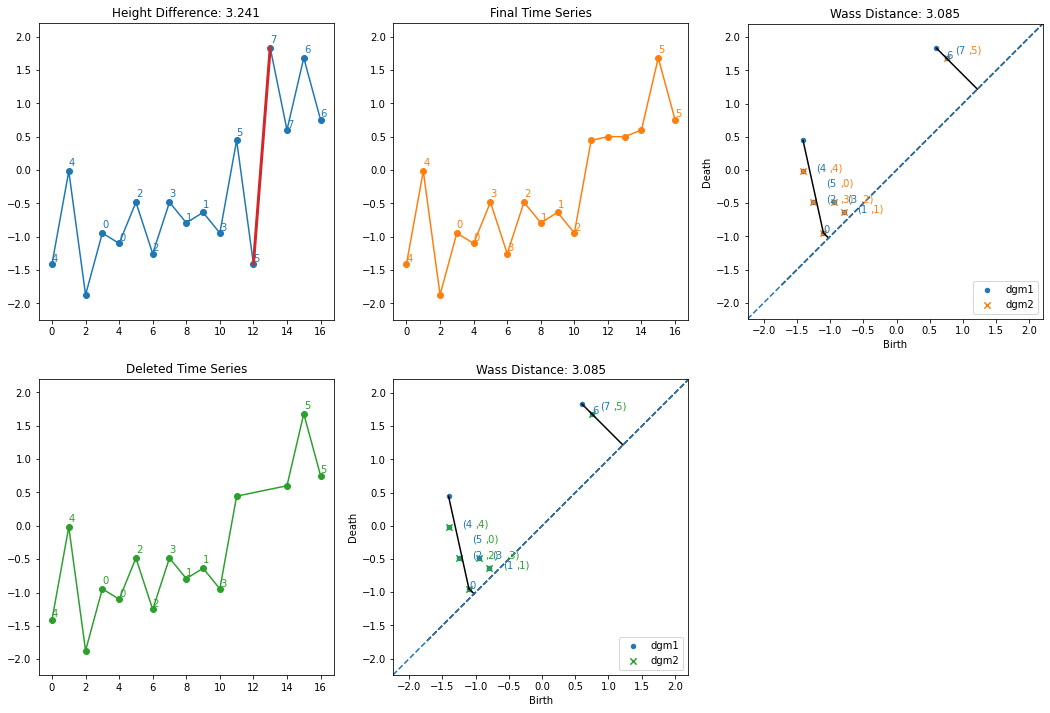

In [2]:
X = np.loadtxt("wiixcrit.txt")

plt.figure(figsize=(18,12))

idx = 26
idx1, idx2 = 12, 13
h = 0.5

x_orig = X[idx, :]
x_orig = x_orig[~np.isnan(x_orig)]
prefix = "TimeSeries{}_{}_{}_{}".format(idx, idx1, idx2, h)

plot_delete_move(x_orig, idx1, idx2, h)
plt.savefig("{}.svg".format(prefix))

In [ ]:
plt.figure(figsize=(18,12))
n_frames=100
animate_delete_moves(x_orig, idx1, idx2, h, prefix=prefix)
filename = "{}.mp4".format(prefix)
if os.path.exists(filename):
    os.remove(filename)
subprocess.call("ffmpeg -r 4 -i {}%d.png -r 4 {}".format(prefix, filename).split())
for i in range(n_frames):
    subprocess.call("rm {}{}.png".format(prefix, i).split())